Author: Neelesh Biswas


This Jupyter Notebook is used as a part of GRIP (Graduate Rotational Internship Program) by The Sparks Foundation

##**Task 2: Prediction using Unsupervised ML (Level - Beginner)**

In this task, we used K-means clustering model to predict the optimum no. of clusters & represent the data visually using the 'iris' dataset.

#What is K-Means Clustering?

**K-means clustering**  It is popular for cluster analysis in data mining. It is a method of vector quantization that aims to partition n observations into *k* clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

**Step 1:** Import libraries & dataset

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
#import the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Step 2:** Load Statistical data & other information of the dataset

In [ ]:
#statistical info of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Step 3:** Using the dataset to depict the plots in various types.

###a) Scatter & line plots

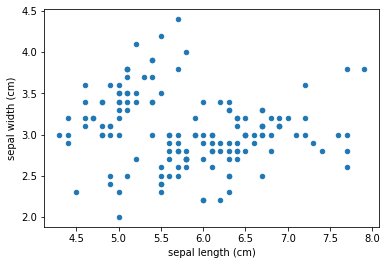

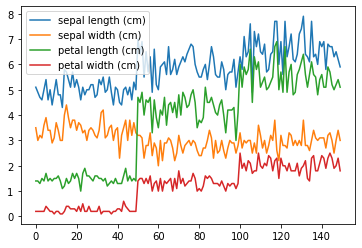

In [ ]:
iris_df.plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)');
iris_df.plot()

### b) Pair Plot

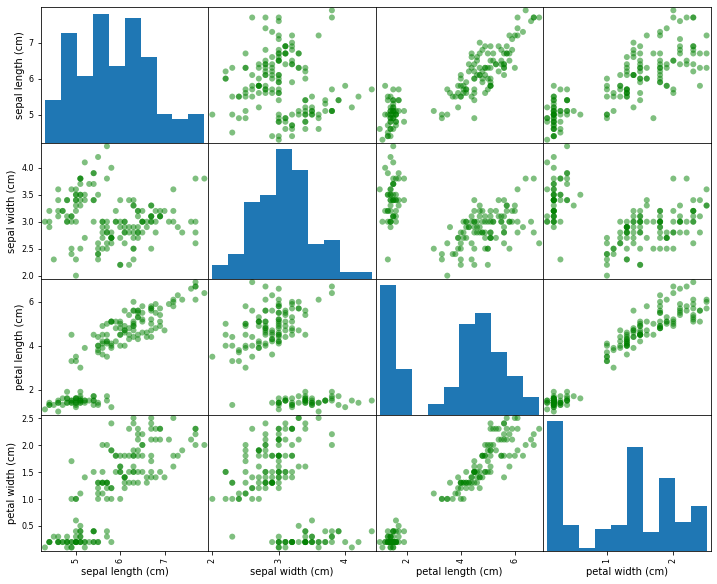

In [ ]:
g = pd.plotting.scatter_matrix(iris_df,marker='o',figsize=(12,10),color='green')

###c) Joint Plot

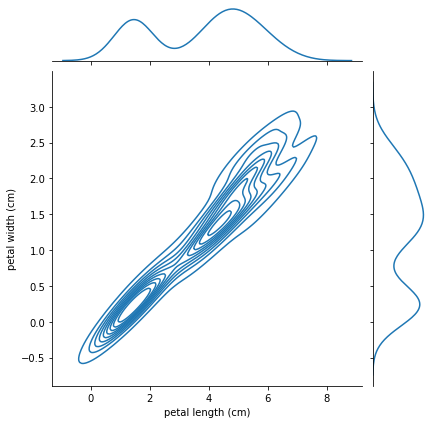

In [ ]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", data=iris_df, kind="kde")

**Step 4:** Training the *k*-means clustering algorithm and plotting the graph using elbow method.

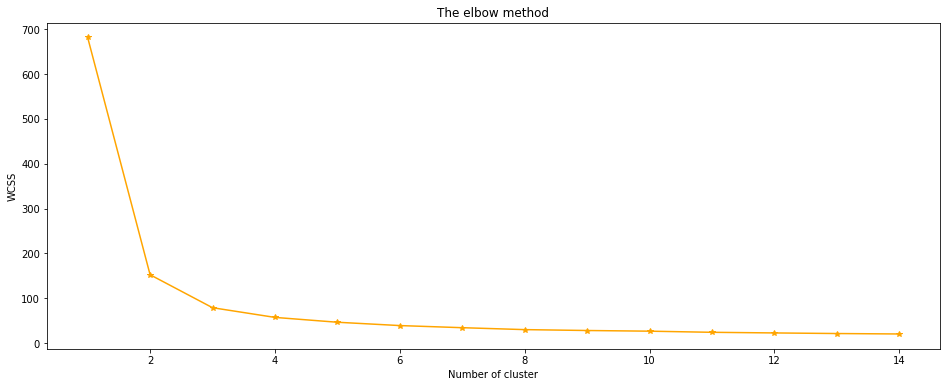

In [ ]:
#training the model
plt.figure(figsize=(16,6))
X = iris_df.iloc[:, [0, 1, 2, 3]].values

WCSS = []
n_cluster = range(1,15)
for i in n_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
# Plotting the results
plt.plot(n_cluster, WCSS,c='orange',marker='*')
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

**Step 5:** Predicting the model & plotting the graph to find the centroids of the clusters.

In [ ]:
#predicting the model
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

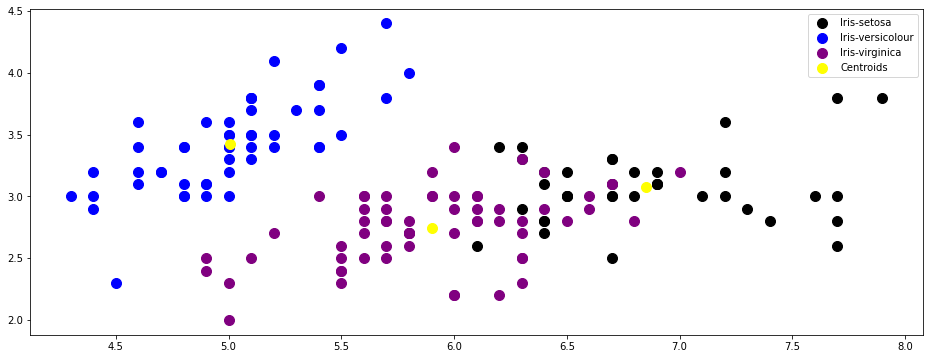

In [ ]:
#plotting the graph
plt.figure(figsize=(16,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()